# seamount roms case, PV inversion, PV from psi

We start from pressure interpolated on a flat grid.
This pressure leads to a geostrophic streamfunction from which one my derive QG potential vorticity.
The inversion of this potential vorticity will exactly lead to the initial streamfunction.
The goal is to estimate how close to bottom sqg is the solution.



In [1]:
import matplotlib.pyplot as plt

from utils import *


/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
path_work = '/home1/datawork/aponte/seamount/'
#
bdy = ['t'+t+'_b'+b for t in ['D','N'] for b in ['D','N']]
path_output = [path_work+'pvfpsi_t'+t+'_b'+b+'/' for t in ['D','N'] for b in ['D','N']]

---

## look at inputs

In [3]:
ds_in = open_input(path_output[0])
f0 = ds_in.f0
#ds_in

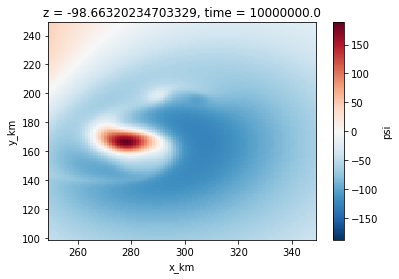

In [4]:
ds_in.psi.isel(z=0).plot(x='x_km',y='y_km')

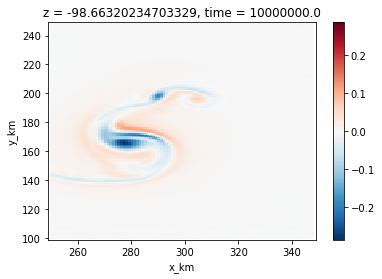

In [5]:
zeta_in = vorticity(ds_in.psi.isel(z=0))
(zeta_in/f0).plot(x='x_km',y='y_km')

---

## load outputs

In [6]:
#S = ['full', 'full_lat0', 'bsqg', 'bsqg_lat0']
#S = ['full']
#D = {}
#for s in S:
#    D[s] = open_output(path_output+'output/output_'+s+'.nc', ds_in)
#print(D['full'])

D = {}
for p,b in zip(path_output,bdy):
    D[b] = open_output(p+'output/output_full.nc', ds_in)
print(D['tD_bD'])


D_bsqg = {}
for p,b in zip(path_output,bdy):
    D_bsqg[b] = open_output(p+'output/output_bsqg.nc', ds_in)

<xarray.Dataset>
Dimensions:  (t: 1, x: 100, y: 150, z: 48)
Coordinates:
  * z        (z) float64 -98.66 -98.03 -97.34 -96.59 ... -1.293 -0.5691 -0.1148
    time     float32 10000000.0
    x_km     (x) float32 249.5 250.5 251.5 252.5 ... 345.5 346.5 347.5 348.5
    y_km     (y) float32 99.5 100.5 101.5 102.5 ... 245.5 246.5 247.5 248.5
  * x        (x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
  * y        (y) float32 99500.0 100500.0 101500.0 ... 247500.0 248500.0
Dimensions without coordinates: t
Data variables:
    mask     (y, x) float64 ...
    psi      (t, z, y, x) float64 -44.71 -45.64 -46.54 ... -26.15 -25.78 -25.4
    q        (t, z, y, x) float64 ...
    zeta     (t, z, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    u        (t, z, y, x) float64 nan -0.000916 -0.000904 ... 0.0003751 nan
    v        (t, z, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan


---

## compare different vertical boundary conditions

In [7]:
ds_in

<xarray.Dataset>
Dimensions:  (x: 100, y: 150, z: 48, zw: 49)
Coordinates:
  * z        (z) float64 -98.66 -98.03 -97.34 -96.59 ... -1.293 -0.5691 -0.1148
  * x        (x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
  * y        (y) float32 99500.0 100500.0 101500.0 ... 247500.0 248500.0
    time     float32 10000000.0
    x_rho    (y, x) float32 249500.0 250500.0 251500.0 ... 347500.0 348500.0
    y_rho    (y, x) float32 99500.0 99500.0 99500.0 ... 248500.0 248500.0
  * zw       (zw) float64 -98.96 -98.36 -97.7 -96.97 ... -0.8977 -0.308 0.01017
    x_km     (x) float32 249.5 250.5 251.5 252.5 ... 345.5 346.5 347.5 348.5
    y_km     (y) float32 99.5 100.5 101.5 102.5 ... 245.5 246.5 247.5 248.5
Data variables:
    psi      (z, y, x) float64 -44.71 -45.64 -46.54 ... -26.15 -25.78 -25.4
    N2       (zw) float64 ...
    f        (y, x) float32 ...
    f0       float32 ...
    q        (z, y, x) float64 3.3e-09 6.856e-09 ... 1.567e-09 1.311e-09
    rho_bg   (z, y, x) float32

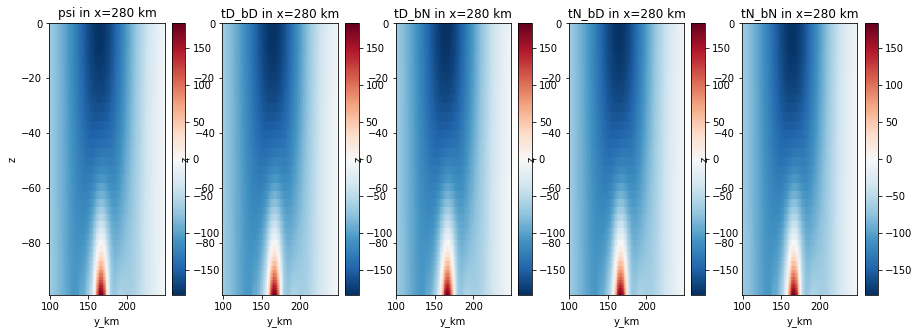

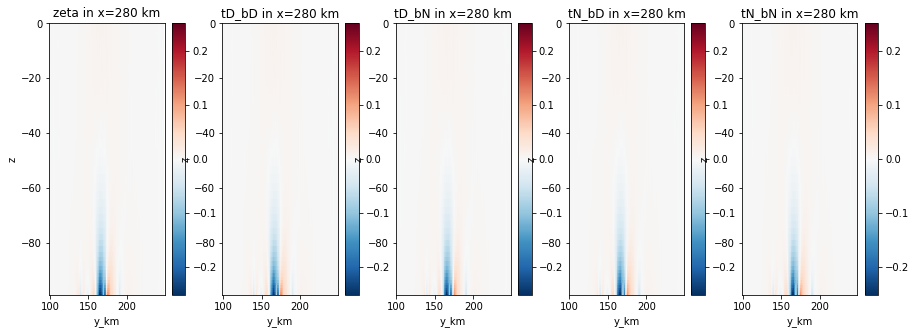

In [9]:
x=280  # km

for v in ['psi','zeta']:

    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(1,5,1)
    toplt = ds_in[v]
    if v=='zeta':
        toplt = toplt/f0 
    xrsel(toplt,'x_km',x).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
    ax.set_title('%s in x=%.0f km'%(v, x))

    iplt=2
    for b,d in D.items():
        ax = fig.add_subplot(1,5,iplt)
        toplt = d[v]
        if v=='zeta':
            toplt = toplt/f0 
        xrsel(toplt,'x_km',x).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
        ax.set_title('%s in x=%.0f km'%(b, x))        
        iplt+=1
        

---

## Bottom SQG solution

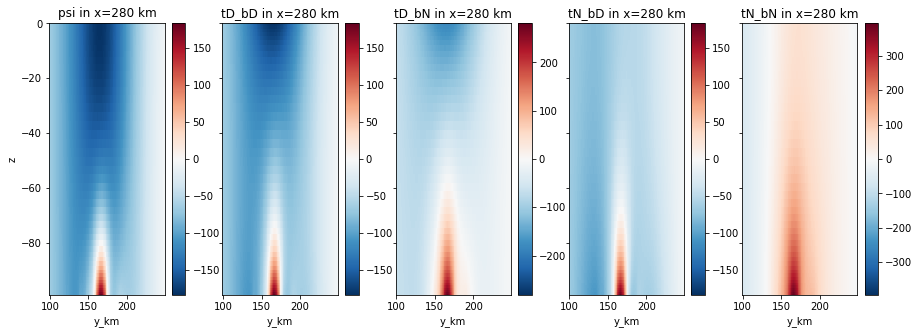

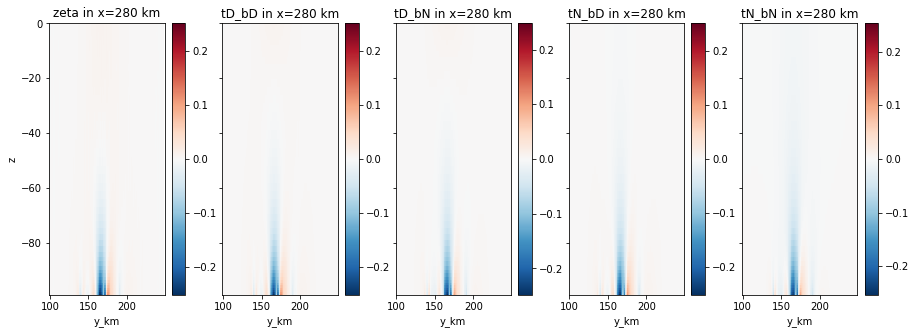

In [10]:
for v in ['psi','zeta']:

    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(1,5,1)
    toplt = ds_in[v]
    #toplt0 = toplt
    if v=='zeta':
        toplt = toplt/f0 
    xrsel(toplt,'x_km',x).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
    ax.set_title('%s in x=%.0f km'%(v, x))

    iplt=2
    for b,d in D_bsqg.items():
        ax = fig.add_subplot(1,5,iplt)
        toplt = d[v]
        if v=='zeta':
            toplt = toplt/f0 
        xrsel(toplt,'x_km',x).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
        ax.set_yticklabels([])
        ax.set_ylabel('')
        ax.set_title('%s in x=%.0f km'%(b, x))        
        iplt+=1
        

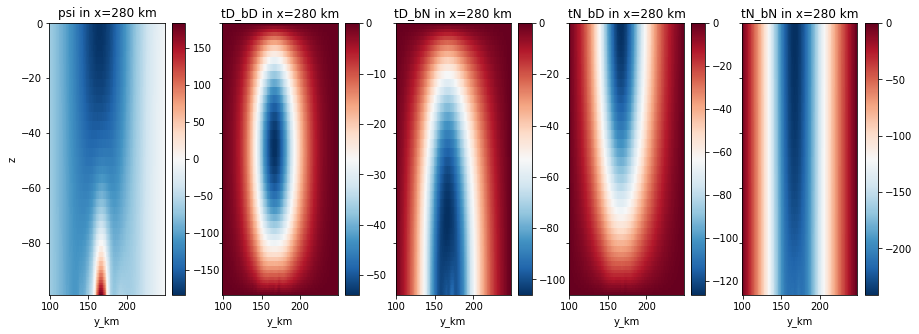

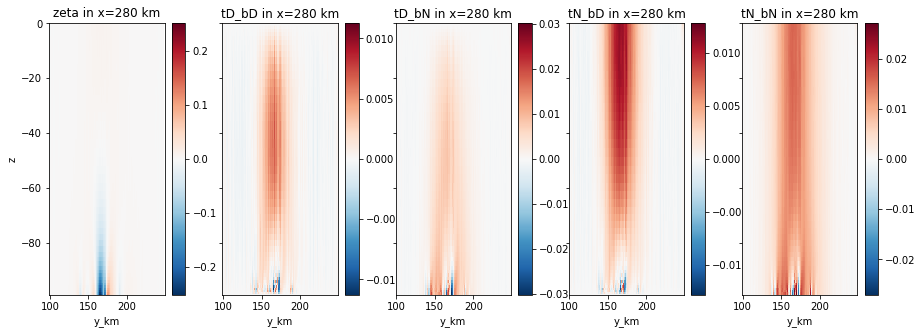

In [11]:
for v in ['psi','zeta']:

    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(1,5,1)
    toplt = ds_in[v]
    toplt0 = toplt
    if v=='zeta':
        toplt = toplt/f0 
    xrsel(toplt,'x_km',x).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
    ax.set_title('%s in x=%.0f km'%(v, x))

    iplt=2
    for b,d in D_bsqg.items():
        ax = fig.add_subplot(1,5,iplt)
        toplt = toplt0 - d[v]
        if v=='zeta':
            toplt = toplt/f0 
        xrsel(toplt,'x_km',x).plot(ax=ax, x='y_km', y='z', cmap='RdBu_r')
        ax.set_yticklabels([])
        ax.set_ylabel('')
        ax.set_title('%s in x=%.0f km'%(b, x))       
        iplt+=1
        

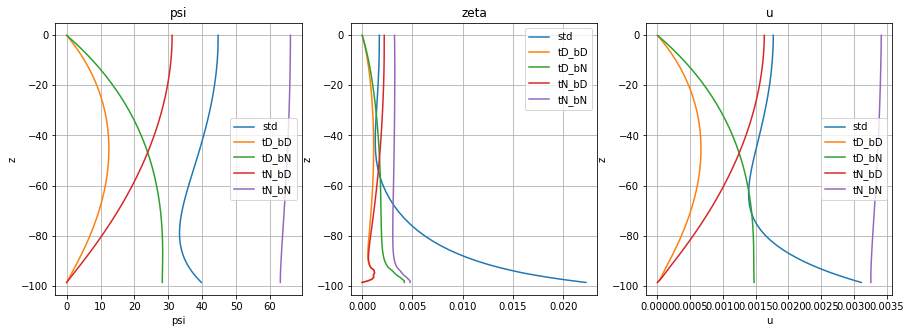

In [12]:
v = 'psi'

fig = plt.figure(figsize=(15,5))
iplt = 1    
for v in ['psi','zeta','u']:

    #
    ax = fig.add_subplot(1,3,iplt)
        
    std = ds_in[v].std(dim=['x','y'])
    if v=='zeta':
        std = std/f0
    std.plot(ax=ax, y='z', label='std')

    for b,d in D_bsqg.items():
        diff = (d[v]-ds_in[v]).std(dim=['x','y'])
        if v=='zeta':
            diff = diff/f0
        diff.plot(ax=ax, y='z', label=b)
    ax.legend()
    ax.grid()
    ax.set_title(v)
    iplt+=1

---

## horizontal maps

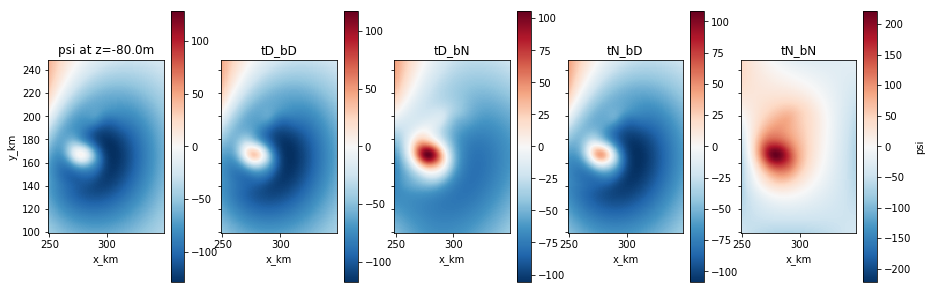

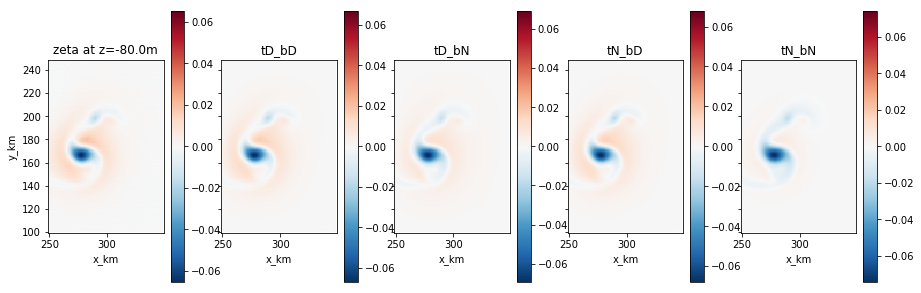

In [13]:
z=-80

for v in ['psi','zeta']:

    fig = plt.figure(figsize=(15,5))

    ax = fig.add_subplot(1,5,1)
    toplt = ds_in[v]
    if v=='zeta':
        toplt = toplt/f0 
    toplt.sel(z=z, method='nearest').plot(ax=ax, x='x_km', y='y_km', cmap='RdBu_r')
    ax.set_title('%s at z=%.1fm'%(v, z))
    ax.set_aspect('equal', 'box')

    iplt=2
    for b,d in D_bsqg.items():
        ax = fig.add_subplot(1,5,iplt)
        toplt = d[v]
        if v=='zeta':
            toplt = toplt/f0 
        toplt.sel(z=z, method='nearest').plot(ax=ax, x='x_km', y='y_km', cmap='RdBu_r')
        ax.set_yticklabels([])
        ax.set_ylabel('')
        ax.set_title('%s'%(b))
        ax.set_aspect('equal', 'box')
        iplt+=1    

---

## show background

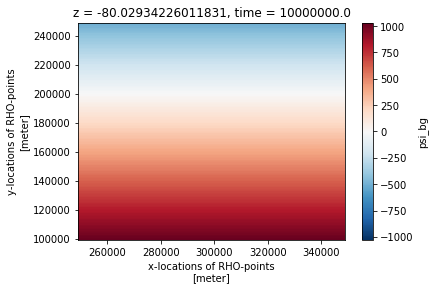

In [14]:
ds_in.psi_bg.sel(z=z, method='nearest').plot()